In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Pré-processamento e métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ignorar warnings desnecessários
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('D:\\Users\\Admin\Desktop\\Dados-SciteJR-Treinamento\\projeto 1\\netflix_clean.csv')
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Year,...,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe,Duration_Num,Duration_Minutes,Duration_Seasons,duration_minutes
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,...,False,False,False,False,False,False,4.0,NaN,4.0,NaN
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",2016.0,...,False,False,False,False,False,False,93.0,93.0,NaN,93.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies",2018.0,...,False,False,False,False,False,False,78.0,78.0,NaN,78.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,...,False,False,False,False,False,False,80.0,80.0,NaN,80.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,2020.0,...,False,False,False,False,False,False,123.0,123.0,NaN,123.0


In [3]:
cleaned_columns = []
seen_normalized_names = set()

# Itere sobre as colunas atuais do DataFrame
for col in df.columns:
    # Crie uma versão "normalizada" do nome da coluna (sem vírgulas, tudo em minúsculas)
    normalized_name = col.replace(',', '').strip().lower()

    # Se a versão normalizada do nome ainda não foi vista, adicione a coluna à nova lista
    if normalized_name not in seen_normalized_names:
        cleaned_columns.append(col)
        seen_normalized_names.add(normalized_name)

# Reatribua as colunas limpas ao seu DataFrame
df = df[cleaned_columns]

# Verifique as novas colunas para confirmar a limpeza
print("O DataFrame foi limpo com sucesso! As novas colunas são:")
print(df.columns)

O DataFrame foi limpo com sucesso! As novas colunas são:
Index(['Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date',
       'Rating', 'Duration', 'Type', 'Year',
       ...
       'United States', 'Uruguay', 'Vatican City', 'Venezuela', 'Vietnam',
       'West Germany', 'Zimbabwe', 'Duration_Num', 'Duration_Minutes',
       'Duration_Seasons'],
      dtype='object', length=172)


In [4]:
list(df.columns)


['Category',
 'Title',
 'Director',
 'Cast',
 'Country',
 'Release_Date',
 'Rating',
 'Duration',
 'Type',
 'Year',
 'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 

In [5]:
df.to_csv('meu_arquivo_limpo.csv', index=False)

print("Arquivo 'meu_arquivo_limpo.csv' salvo com sucesso!")

Arquivo 'meu_arquivo_limpo.csv' salvo com sucesso!


Arquivo 'meu_arquivo_limpo.csv' carregado com sucesso.

Cluster 0:
Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Austria, Bangladesh, Belgium, Bulgaria, Cambodia, Chile, Croatia, Dominican Republic, Egypt, France, Georgia, Ghana, Guatemala, Hong Kong, Hungary, India, Indonesia, Iran, Iraq, Italy, Jamaica, Jordan, Kenya, Latvia, Lebanon, Lithuania, Luxembourg, Malaysia, Mongolia, Montenegro, Morocco, Namibia, Nepal, Netherlands, Nigeria, Pakistan, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Serbia, Slovakia, Slovenia, South Africa, Soviet Union, Spain, Sri Lanka, Switzerland, Turkey, United Arab Emirates, Uruguay, Vatican City, Vietnam, Zimbabwe

Cluster 1:
Australia, Azerbaijan, Bahamas, Belarus, Brazil, Canada, Cayman Islands, China, Colombia, Cuba, Cyprus, Czech Republic, Denmark, East Germany, Finland, Germany, Greece, Iceland, Ireland, Israel, Japan, Kazakhstan, Kuwait, Liechtenstein, Malawi, Malta, Mauritius, Mexico, New Zealand, Norway, Puerto Rico

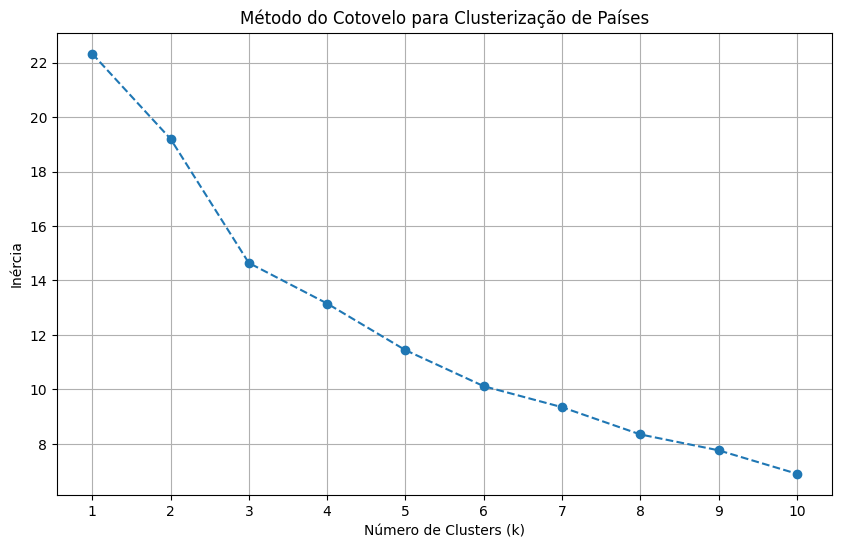

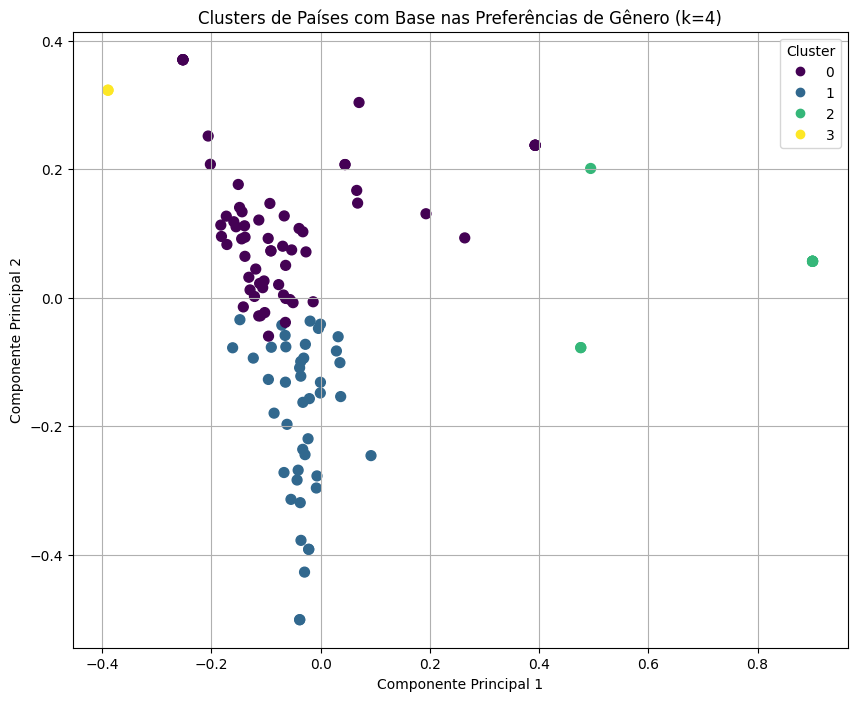

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings

# Ignora avisos para uma saída mais limpa
warnings.filterwarnings('ignore')

# 1. Carregar os dados
try:
    df = pd.read_csv('meu_arquivo_limpo.csv')
    print("Arquivo 'meu_arquivo_limpo.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: O arquivo 'meu_arquivo_limpo.csv' não foi encontrado. Por favor, verifique se ele está no mesmo diretório.")
    exit()

# 2. Definir as colunas de gêneros e países
genre_columns = ['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']
country_columns = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sri Lanka', 'Sudan', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Vatican City', 'Venezuela', 'Vietnam', 'West Germany', 'Zimbabwe']

# 3. Preparar os dados para a clusterização (agregar e normalizar)
country_genre_counts = pd.DataFrame(index=country_columns, columns=genre_columns)
for country in country_columns:
    country_filter = df[country] == True
    country_genre_counts.loc[country] = df.loc[country_filter, genre_columns].sum()

country_total_titles = country_genre_counts.sum(axis=1)
df_proportions = country_genre_counts.div(country_total_titles, axis=0)

# Remove países que não têm nenhum filme/série na base de dados
df_proportions.dropna(how='all', inplace=True)

# 4. Encontrar o número ideal de clusters (Método do Cotovelo)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_proportions)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Clusterização de Países')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)


# 5. Aplicar a clusterização com um número de clusters escolhido
# Com base na análise do gráfico do cotovelo, 4 clusters é uma boa escolha.
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df_proportions['cluster'] = kmeans.fit_predict(df_proportions)

# 6. Visualizar os clusters com PCA (redução de dimensionalidade)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_proportions.drop('cluster', axis=1))
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df_proportions.index)
df_pca['cluster'] = df_proportions['cluster']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.title(f'Clusters de Países com Base nas Preferências de Gênero (k={n_clusters})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)

# 7. Exibir e salvar os resultados
for cluster_id in sorted(df_proportions['cluster'].unique()):
    countries_in_cluster = df_proportions[df_proportions['cluster'] == cluster_id].index.tolist()
    print(f"\nCluster {cluster_id}:")
    print(", ".join(countries_in_cluster))

df_proportions.to_csv('country_clusters_results.csv')
print("\nOs resultados da clusterização, incluindo a atribuição de cluster para cada país, foram salvos em 'country_clusters_results.csv'.")

Arquivo 'meu_arquivo_limpo.csv' carregado com sucesso.

Cluster 0:
Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Austria, Bangladesh, Belgium, Bulgaria, Cambodia, Chile, Croatia, Dominican Republic, Egypt, France, Georgia, Ghana, Guatemala, Hong Kong, Hungary, India, Indonesia, Iran, Iraq, Italy, Jamaica, Jordan, Kenya, Latvia, Lebanon, Lithuania, Luxembourg, Malaysia, Mongolia, Montenegro, Morocco, Namibia, Nepal, Netherlands, Nigeria, Pakistan, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Serbia, Slovakia, Slovenia, South Africa, Soviet Union, Spain, Sri Lanka, Switzerland, Turkey, United Arab Emirates, Uruguay, Vatican City, Vietnam, Zimbabwe

Cluster 1:
Australia, Azerbaijan, Bahamas, Belarus, Brazil, Canada, Cayman Islands, China, Colombia, Cuba, Cyprus, Czech Republic, Denmark, East Germany, Finland, Germany, Greece, Iceland, Ireland, Israel, Japan, Kazakhstan, Kuwait, Liechtenstein, Malawi, Malta, Mauritius, Mexico, New Zealand, Norway, Puerto Rico

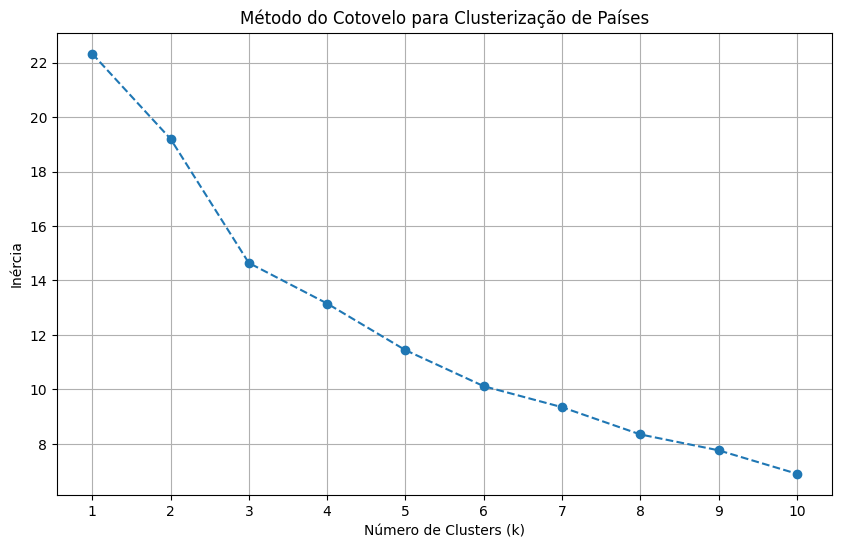

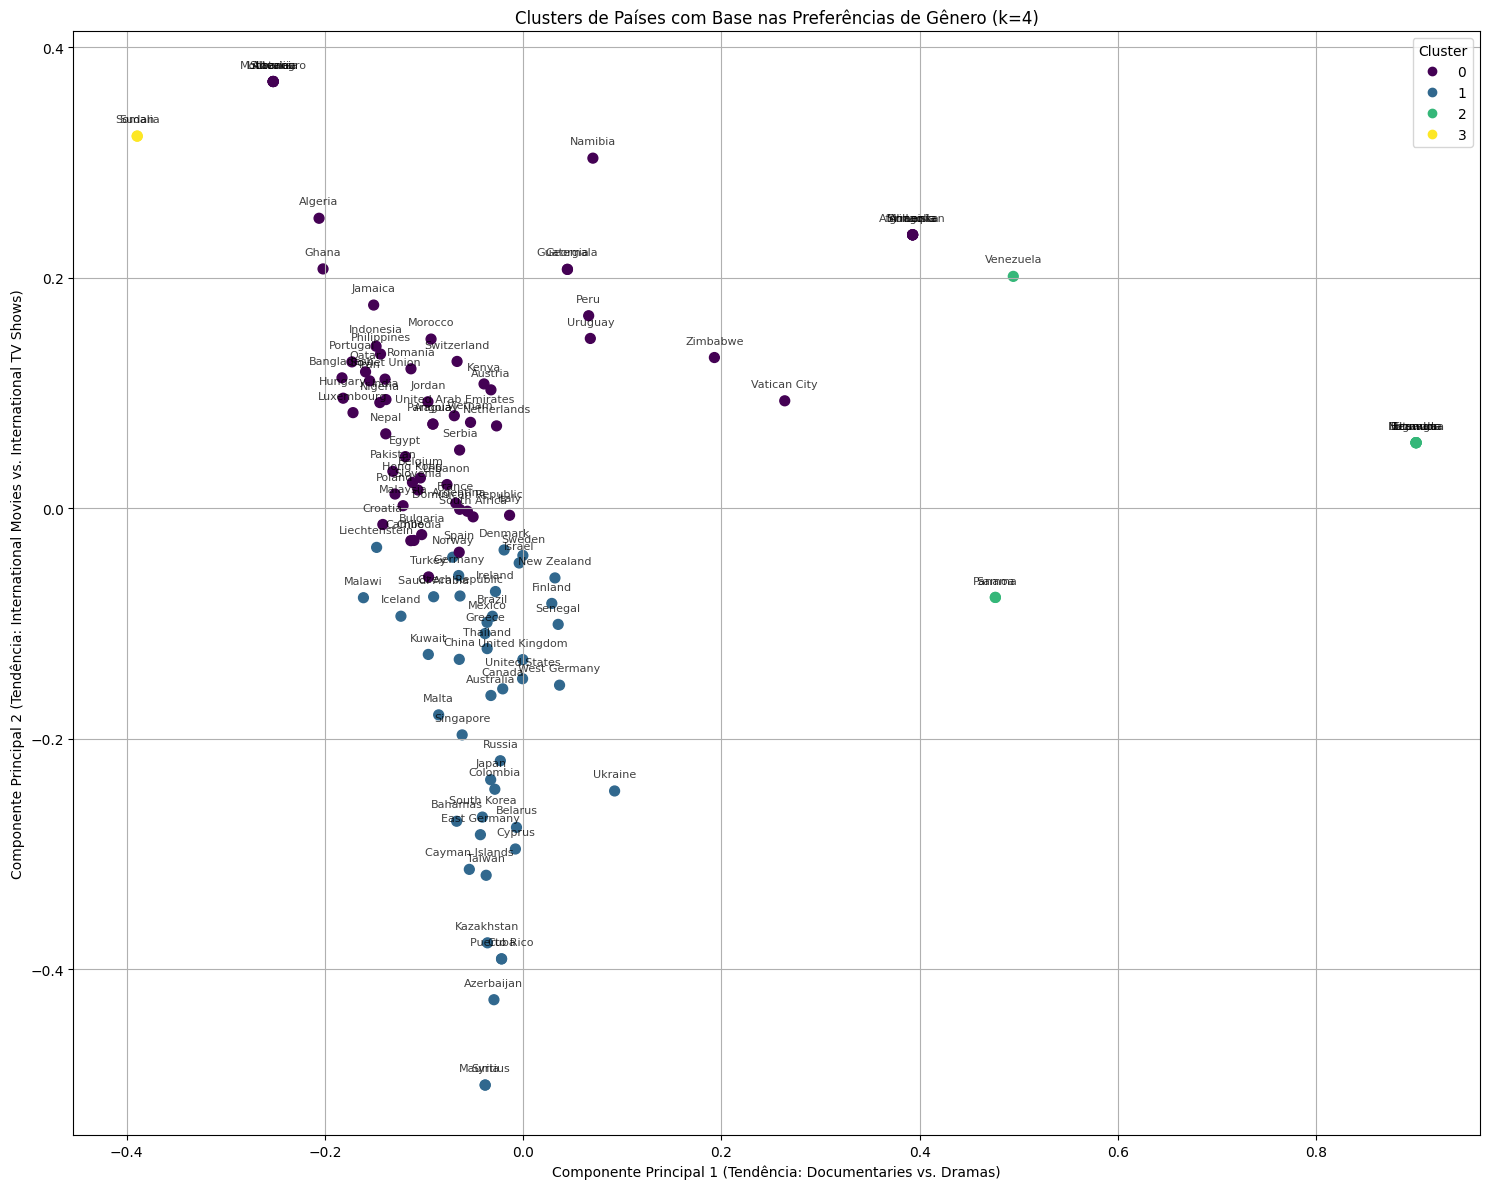

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings

# Ignora avisos para uma saída mais limpa
warnings.filterwarnings('ignore')

# 1. Carregar os dados
try:
    df = pd.read_csv('meu_arquivo_limpo.csv')
    print("Arquivo 'meu_arquivo_limpo.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: O arquivo 'meu_arquivo_limpo.csv' não foi encontrado. Por favor, verifique se ele está no mesmo diretório.")
    exit()

# 2. Definir as colunas de gêneros e países
genre_columns = ['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']
country_columns = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sri Lanka', 'Sudan', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Vatican City', 'Venezuela', 'Vietnam', 'West Germany', 'Zimbabwe']

# 3. Preparar os dados para a clusterização (agregação e normalização)
country_genre_counts = pd.DataFrame(index=country_columns, columns=genre_columns)
for country in country_columns:
    country_filter = df[country] == True
    country_genre_counts.loc[country] = df.loc[country_filter, genre_columns].sum()
country_total_titles = country_genre_counts.sum(axis=1)
df_proportions = country_genre_counts.div(country_total_titles, axis=0)
df_proportions.dropna(how='all', inplace=True)

# 4. Encontrar o número ideal de clusters (Método do Cotovelo)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_proportions)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Clusterização de Países')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('elbow_method_plot.png')

# 5. Aplicar a clusterização com um número de clusters escolhido
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df_proportions['cluster'] = kmeans.fit_predict(df_proportions)

# 6. Visualizar os clusters com PCA (redução de dimensionalidade)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_proportions.drop('cluster', axis=1))
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df_proportions.index)
df_pca['cluster'] = df_proportions['cluster']

# Analisa os componentes para criar legendas melhores para os eixos
components = pca.components_
pc1_loadings = pd.Series(components[0], index=genre_columns)
pc2_loadings = pd.Series(components[1], index=genre_columns)
xlabel = f"Componente Principal 1 (Tendência: {pc1_loadings.idxmax()} vs. {pc1_loadings.idxmin()})"
ylabel = f"Componente Principal 2 (Tendência: {pc2_loadings.idxmax()} vs. {pc2_loadings.idxmin()})"

plt.figure(figsize=(15, 12))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.title(f'Clusters de Países com Base nas Preferências de Gênero (k={n_clusters})')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)

# Adiciona os nomes dos países ao gráfico
for i, country in enumerate(df_pca.index):
    plt.annotate(country, (df_pca['PC1'][i], df_pca['PC2'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, alpha=0.75)
plt.tight_layout()
plt.savefig('clusters_plot_annotated.png')

# 7. Exibir e salvar os resultados
for cluster_id in sorted(df_proportions['cluster'].unique()):
    countries_in_cluster = df_proportions[df_proportions['cluster'] == cluster_id].index.tolist()
    print(f"\nCluster {cluster_id}:")
    print(", ".join(countries_in_cluster))

df_proportions.to_csv('country_clusters_results.csv')
print("\nOs resultados da clusterização, incluindo a atribuição de cluster para cada país, foram salvos em 'country_clusters_results.csv'.")

In [8]:
import pandas as pd

# Supondo que você já tenha o DataFrame 'df_proportions' com os resultados
# Se ele foi salvo em CSV, você pode carregá-lo primeiro:
# df_proportions = pd.read_csv('country_clusters_results.csv', index_col=0)

# Exporta o DataFrame para um arquivo Parquet
df_proportions.to_parquet('country_clusters_results.parquet')

print("O arquivo 'country_clusters_results.parquet' foi salvo com sucesso.")

O arquivo 'country_clusters_results.parquet' foi salvo com sucesso.
